In [1]:
import sys
sys.path.append("../")

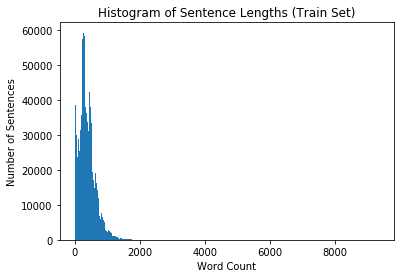

min: 2, median: 195, max: 9362


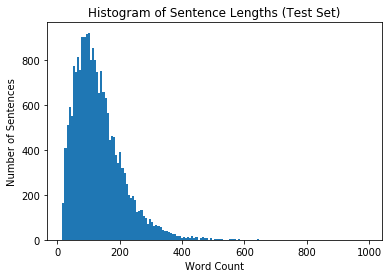

min: 16, median: 30, max: 992


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

def get_length_counts(path):
  counts = []
  with open(path, "r") as f:
    for line in f:
      label, sentence = line.split(" ", 1)
      counts.append(len(sentence.replace(" ", "")))
  counts = np.array(counts)
  return counts
  

europarl_base_path = "/home/david/Programming/data/WMT/europarl"
train_path = os.path.join(europarl_base_path, "txt_noxml/europarl.tokenized.all")
test_path = os.path.join(europarl_base_path, "test/europarl.tokenized.test")

counts = []

counts = get_length_counts(train_path)
#print(np.histogram(counts, bins="auto"))
plt.title("Histogram of Sentence Lengths (Train Set)")
plt.hist(counts, bins="auto")
plt.xlabel("Word Count")
plt.ylabel("Number of Sentences")
plt.show()
print("min: {}, median: {}, max: {}".format(counts.min(), counts[len(counts)//2], counts.max()))

counts = get_length_counts(test_path)
plt.title("Histogram of Sentence Lengths (Test Set)")
plt.hist(counts, bins="auto")
plt.xlabel("Word Count")
plt.ylabel("Number of Sentences")
plt.show()
print("min: {}, median: {}, max: {}".format(counts.min(), counts[len(counts)//2], counts.max()))


In [9]:
def get_words(path):
  words = set([])
  with open(path, "r") as f:
    for line in f:
      label, sentence = line.split(" ", 1)
      words.update(sentence.split(" "))
  return words

words_train = get_words(train_path)
words_test = get_words(test_path)

print("Number of words in test set but not in train set: {}".format(len(words_test - words_train)))


Number of words in test set but not in train set: 0


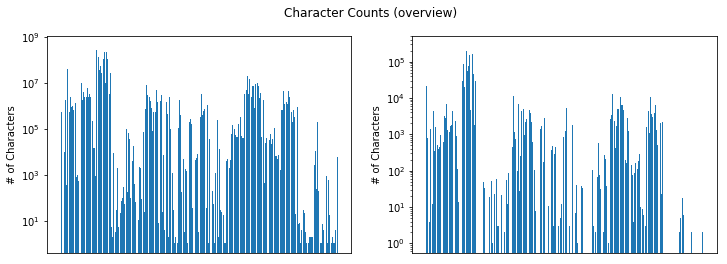

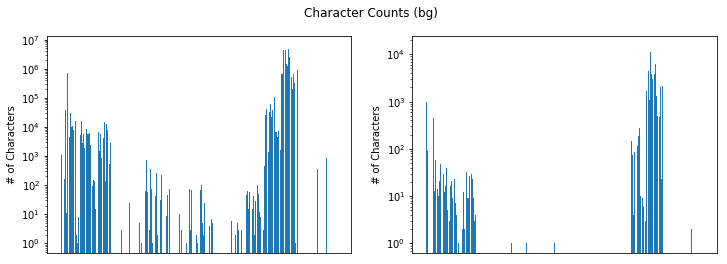

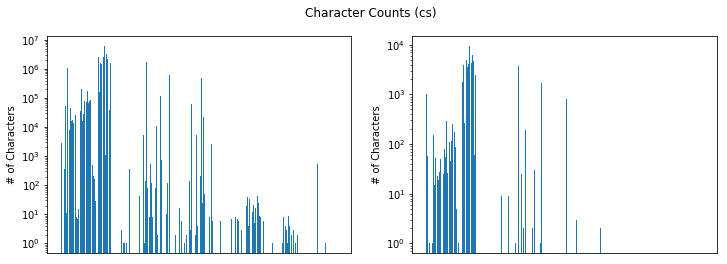

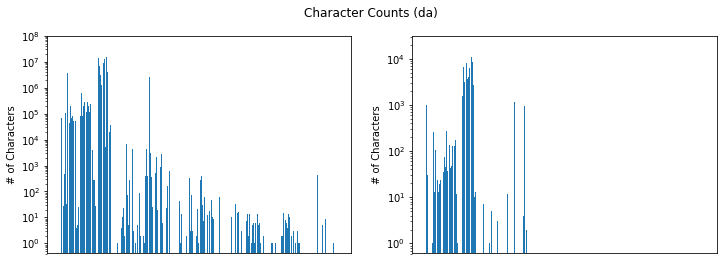

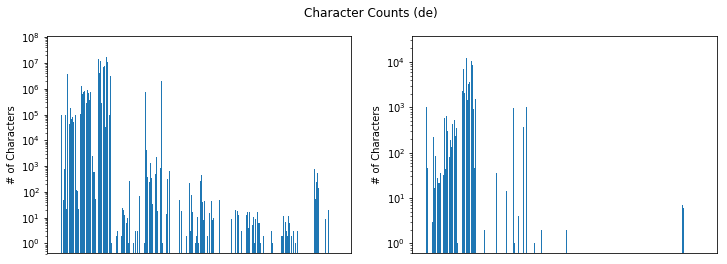

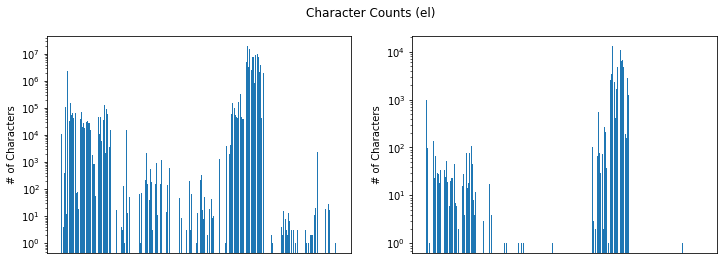

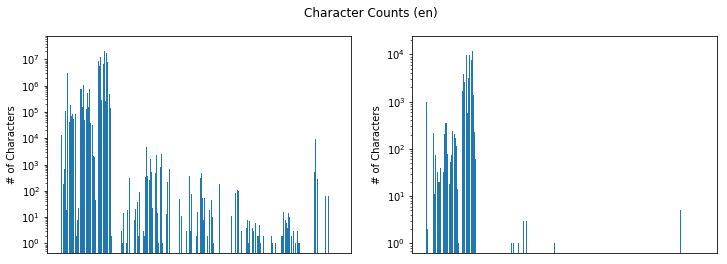

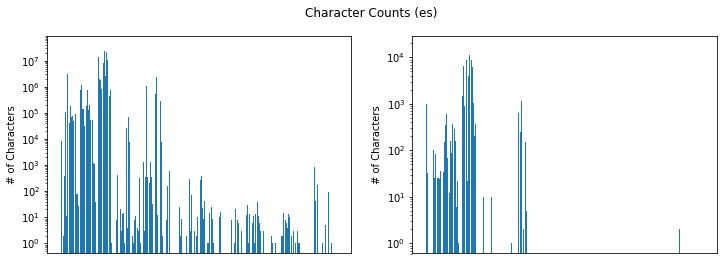

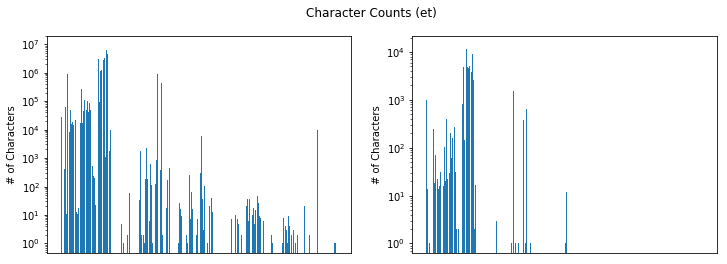

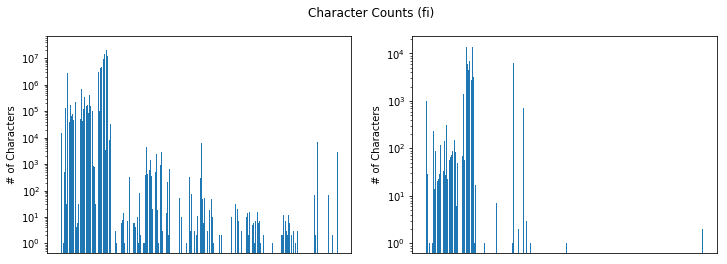

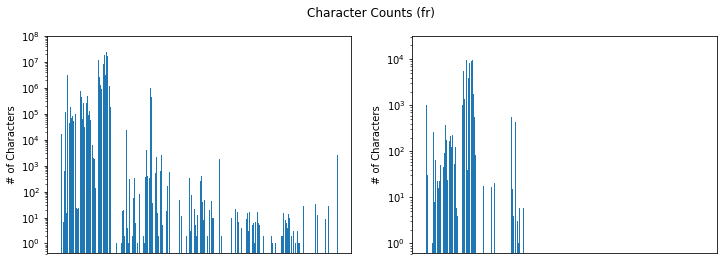

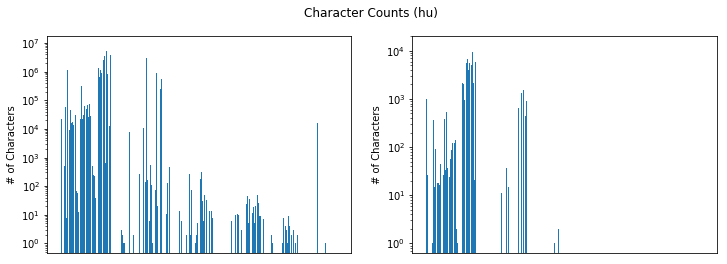

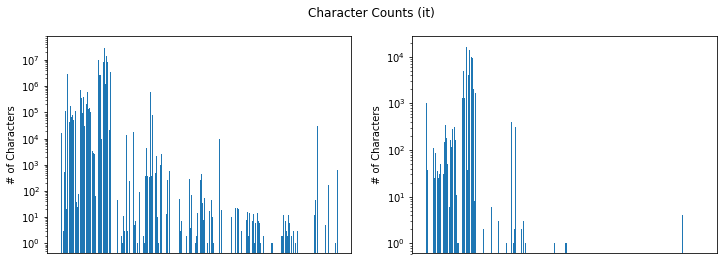

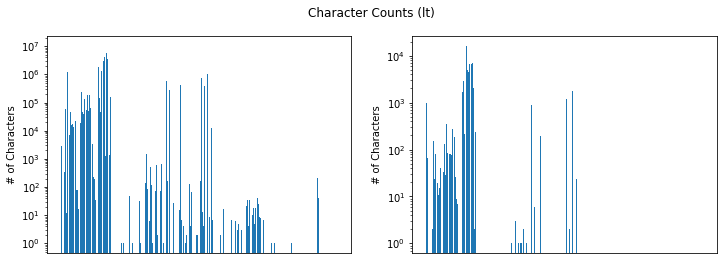

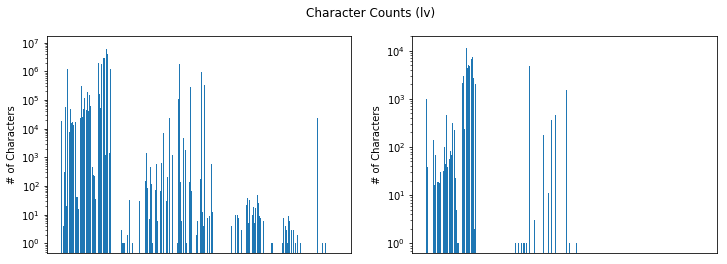

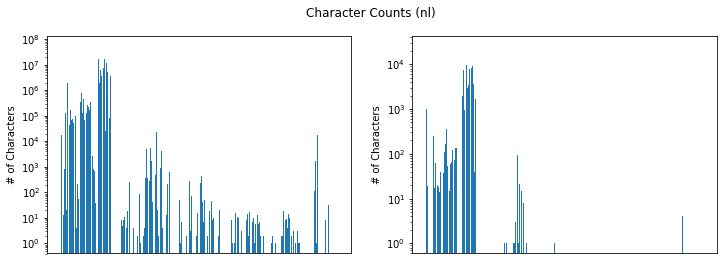

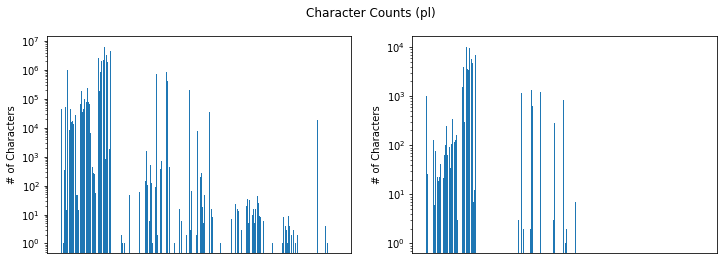

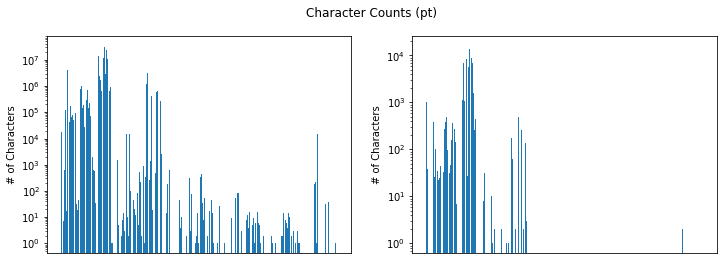

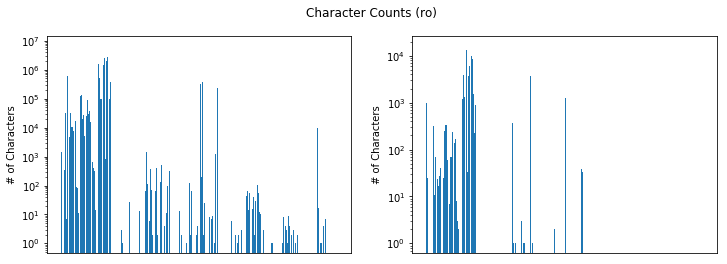

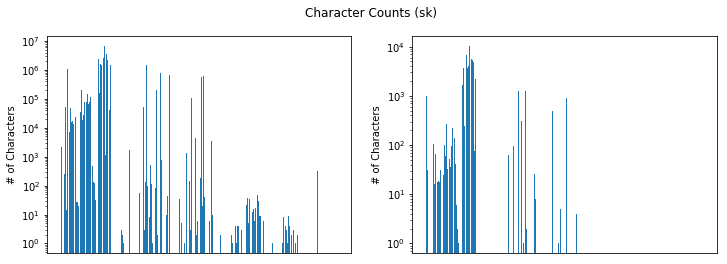

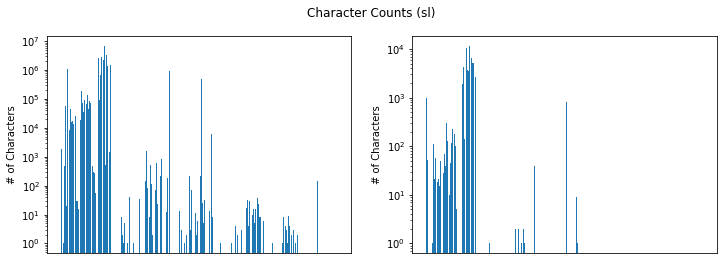

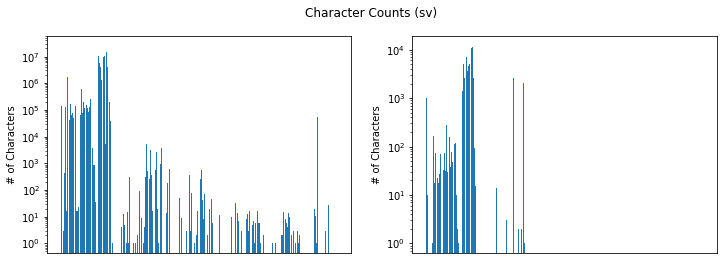

In [23]:
from collections import Counter

def get_char_counts(path, charset_full = None):
  characters = {"overall": Counter()}
  with open(path, "r") as f:
    for line in f:
      label, sentence = line.split(" ", 1)
      char_count = Counter([c for c in sentence.replace(" ", "")])
      characters["overall"].update(char_count)
      if label not in characters:
        characters[label] = Counter()
      characters[label].update(char_count)
  if not charset_full:
      charset_full = {c: 0 for c in characters["overall"].keys()}
  for label in characters.keys():
    characters[label].update(charset_full)
  return characters, charset_full

def plot_characters(char_count1, char_count2, titles = ["Train", "Test"]):
  
  def _create_plot(lang_counts, lang_name, titles=titles):
    # sort character counts by character
    _, counts1 = zip(*sorted([(k, v) for k, v in lang_counts[0].items()]))
    _, counts2 = zip(*sorted([(k, v) for k, v in lang_counts[1].items()]))
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    fig.suptitle("Character Counts ({})".format(lang_name))
    # create plots for counts
    for i, cnt in enumerate([counts1, counts2]):
      axs[i].bar(range(len(cnt)), cnt)
      axs[i].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
      axs[i].set_yscale("log")
      axs[i].set_ylabel("# of Characters")
    plt.show()

  # plot overall
  _create_plot([char_count1["overall"], char_count2["overall"]], "overview")
  # plot languages sorted by language
  for counts1, counts2 in zip(sorted(list(char_count1.items())), sorted(list(char_count2.items()))):
    if counts1[0] != "overall": _create_plot([counts1[1], counts2[1]], counts1[0].replace("__label__", ""))

char_count_train, charset_train = get_char_counts(train_path)
char_count_test, _ = get_char_counts(test_path, charset_full = charset_train)

plot_characters(char_count_train, char_count_test)
